## CHAPTER 4: DEM Analysis of my hometown Nagpur, using Rasterio package

The following is a project executed by Rishabh Jain in Jupyter notebook, for visualsing and analysing digital elevation model data in python using an open source library Rasterio. The data used for the same is downloaded from Earth Explorer made freely available by USGS

## Installing all the libraries

In [17]:
pip install rasterio

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import rasterio as rio
from rasterio.plot import show
import matplotlib.pyplot as plt


## Uploading the data in tif format

In [ ]:
dem = rio.open("nagpur.tif")
dem_array = dem.read(1).astype('float64')


## Displaying uploaded DEM image

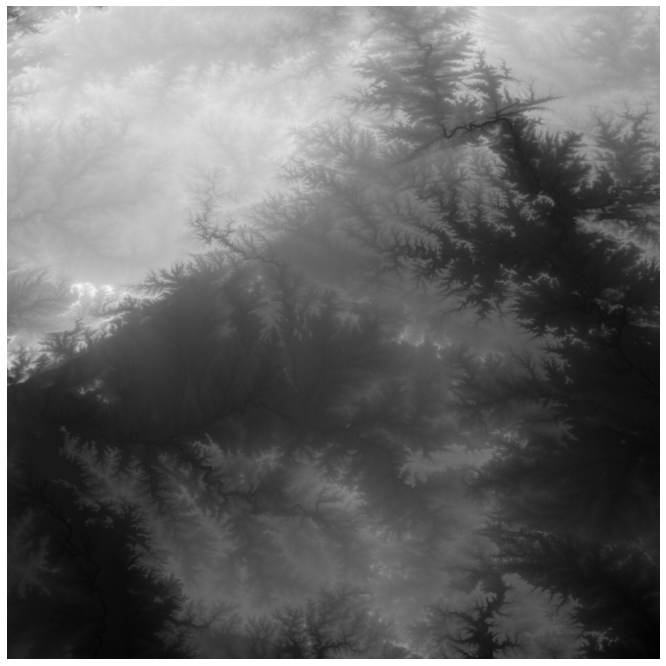

In [3]:
fig, ax = plt.subplots(1, figsize=(12, 12))
show(dem_array, cmap='Greys_r', ax=ax)
plt.axis('off')
plt.show()

## Displaying DEM image with Contour maps

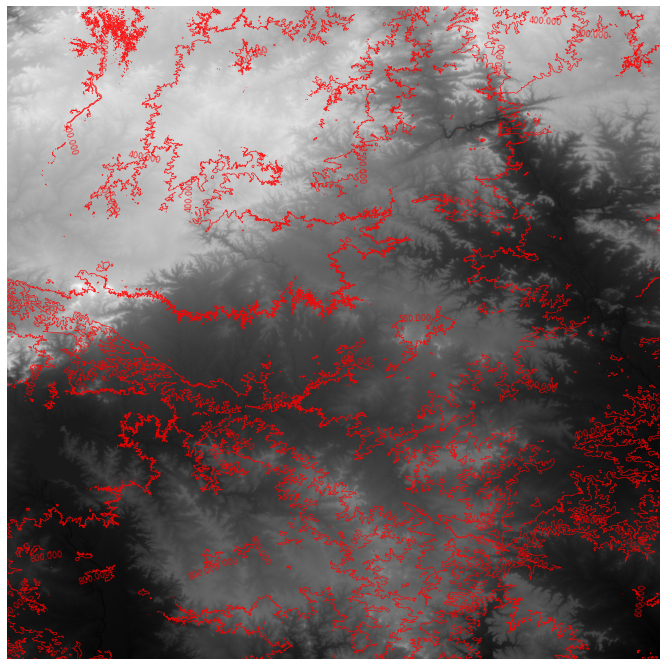

In [4]:
fig, ax = plt.subplots(1, figsize=(12, 12))
show(dem_array, cmap='Greys_r', ax=ax)
show(dem_array, contour=True, ax=ax, linewidths=0.7)
plt.axis("off")
plt.show()

## DEM Visualisation with RichDEM package#

In [5]:
import richdem as rd
dem_richdem = rd.rdarray(dem_array, no_data=-9999)

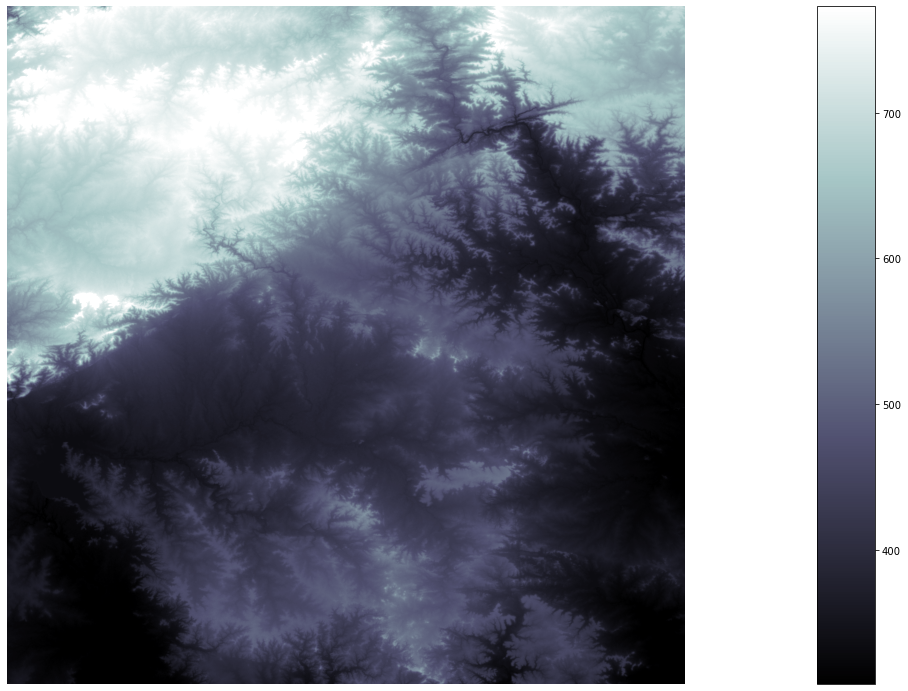

{'vmin': 308.0, 'vmax': 773.0}

In [6]:
fig = rd.rdShow(dem_richdem, axes=False, cmap="bone", figsize=(16, 10)); 
fig 


Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)


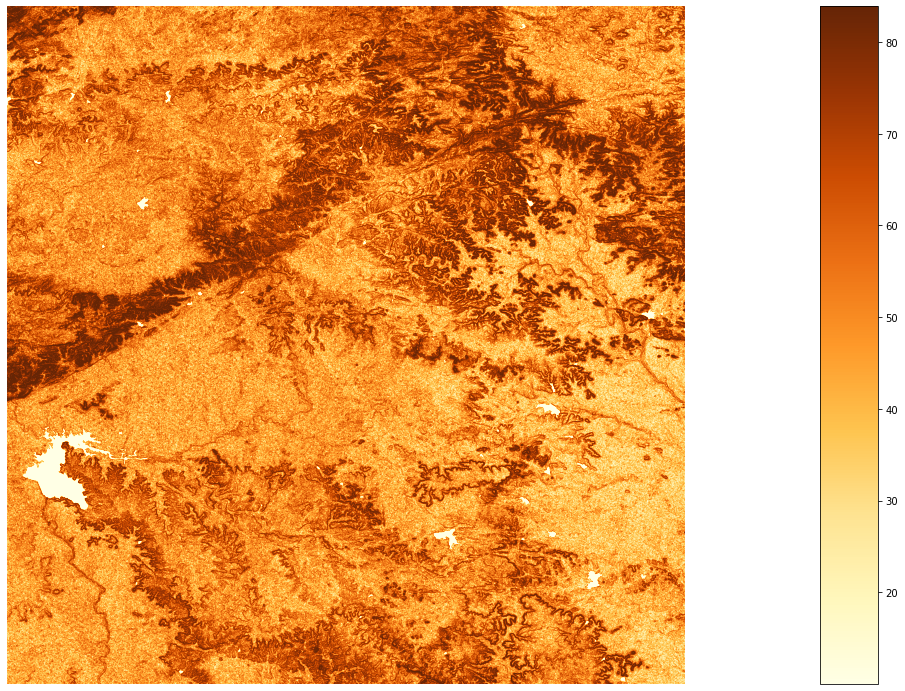

In [7]:
dem_slope = rd.TerrainAttribute(dem_richdem, attrib="slope_degrees") 
rd.rdShow(dem_slope, axes=False, cmap="YlOrBr", figsize=(16, 10));

## Slope Visualisation with heatmap

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)


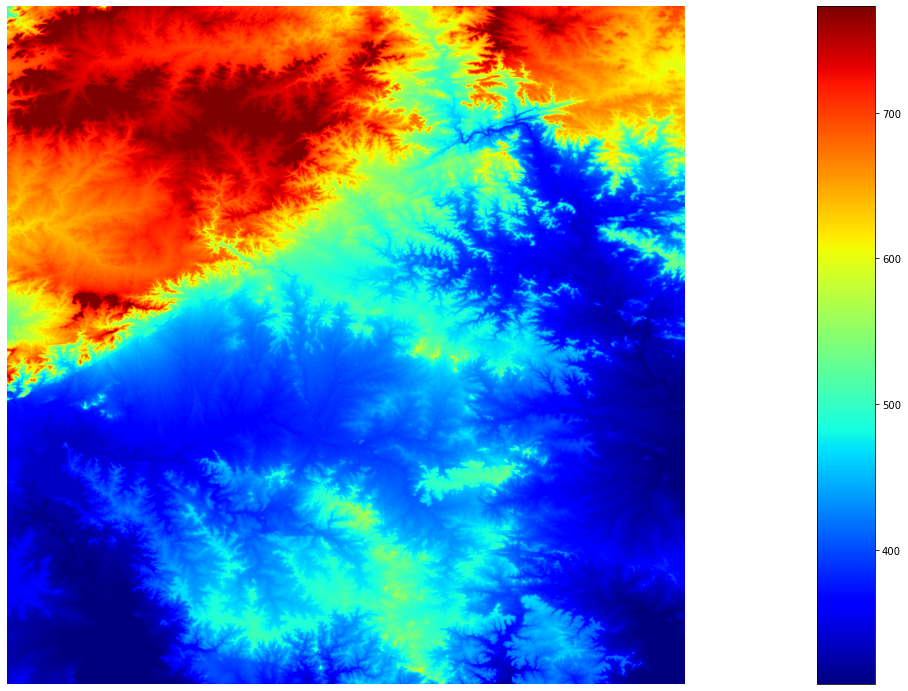

In [8]:
dem_filled = rd.FillDepressions(dem_richdem, in_place=False) 
dem_filled_fig = rd.rdShow(dem_filled, ignore_colours=[0], axes=False, cmap="jet", 
vmin=fig["vmin"], vmax=fig["vmax"], figsize=(16,10))
